# Facial Recognition Modeling 
In this project we will be working with real world data set, indicating whether or not a particular image is of skin or no skin.
We will try to create a model that will predict whether or not the image appearing in front of a camera is a skin or no skin.
This Dataset consists of 4 columns without headers, the missing headers are [B,G,R, Skin or No-skin]
* B => Blue: The ratio of Blue coloring 💙
* G => Green: The ratio of Green coloring 💚
* R => Red : The ratio of Red coloring 💖
* Skin or No-skin => Target (Skin = 1 & No_skin = 2)


#### Import Required Libraries
Import a few libraries you think you'll need (Or just import them as you go along!)

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings


%matplotlib inline
filterwarnings("ignore")

#### Get your data
Read in the Skin_NonSkin.txt file and set it to a data frame called Data.

In [182]:
data = pd.read_csv('Skin_NonSkin.txt', delimiter = '\t',names= ['B','G','R','Skin or No_Skin'])
Data = pd.DataFrame(data)

#### Check the head of the data

In [183]:
Data.head()

,B,G,R,Skin or No_Skin
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


#### Check the shape

In [184]:
Data.shape

(245057, 4)

** Use info and describe() on data**

In [185]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245057 entries, 0 to 245056
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   B                245057 non-null  int64
 1   G                245057 non-null  int64
 2   R                245057 non-null  int64
 3   Skin or No_Skin  245057 non-null  int64
dtypes: int64(4)
memory usage: 7.5 MB


In [186]:
Data.describe()

,B,G,R,Skin or No_Skin
count,245057.000000,245057.000000,245057.000000,245057.000000
mean,125.065446,132.507327,123.177151,1.792461
std,62.255653,59.941197,72.562165,0.405546
min,0.000000,0.000000,0.000000,1.000000
25%,68.000000,87.000000,70.000000,2.000000
50%,139.000000,153.000000,128.000000,2.000000
75%,176.000000,177.000000,164.000000,2.000000
max,255.000000,255.000000,255.000000,2.000000


#### Check the number of skin ratio to the number of no skin

In [187]:
Data.iloc[:,-1].value_counts()

2    194198
1     50859
Name: Skin or No_Skin, dtype: int64

#### Check the percentage of Skin and No skin in the data

In [188]:
val_count = Data.iloc[:,-1].value_counts()

print('Percentage of Skin is: {} %'.format((100*val_count[1])/val_count.sum()))
print('Percentage of Skin is: {} %'.format((100*val_count[2])/val_count.sum()))

Percentage of Skin is: 20.753947040892527 %
Percentage of Skin is: 79.24605295910747 %


#### Check for missing Values

In [189]:
Data.isnull().sum()

B                  0
G                  0
R                  0
Skin or No_Skin    0
dtype: int64

#### Convert the Target 
Such target
Skin == 1;
NO_SKIN == 0

In [190]:
Data['Skin or No_Skin'] = Data['Skin or No_Skin'].map({1:1,2:0})

#### Check the new data head

In [192]:
Data.head()

,B,G,R,Skin or No_Skin
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


#### Check your new ratio

In [193]:
Data.iloc[:,-1].value_counts()

0    194198
1     50859
Name: Skin or No_Skin, dtype: int64

#### Exploratory Data Analysis
Let's use seaborn to explore the data!

Try recreating the plots shown below!

***Create a Countplot of Skin & No skin***

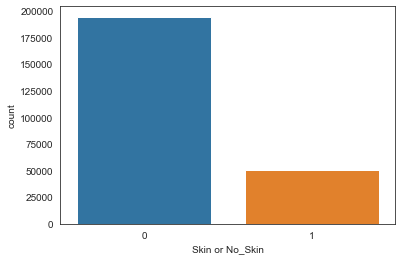

In [194]:
sns.set_style('white')
sns.countplot(x = 'Skin or No_Skin',data = Data)

***Create a bar chart of 'Skin or No-skin' & 'B'***

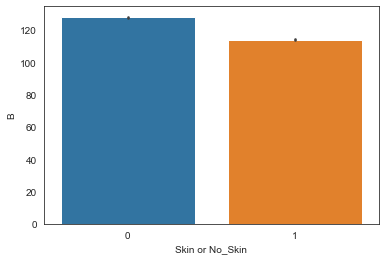

In [195]:
sns.barplot(x ='Skin or No_Skin', y = 'B',data = Data)

***Create a bar chart of 'Skin or No-skin' & 'G'***

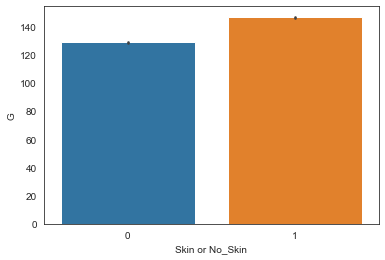

In [196]:
sns.barplot(x ='Skin or No_Skin', y = 'G',data = Data)

***Create a bar chart of 'Skin or No-skin' & 'R'***

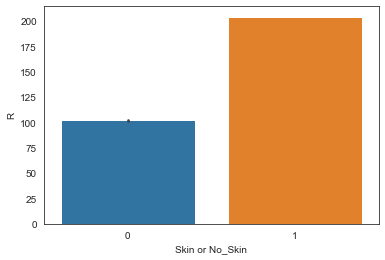

In [197]:
sns.barplot(x ='Skin or No_Skin', y = 'R',data = Data)

#### Logistic Regression
Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

***Define Your features and target***

In [198]:
data = Data.loc[:,:'Skin or No-Skin '].values

target = Data.iloc[:,-1].values

***Split the data into training set and testing set using train_test_split***

In [199]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,target, test_size = 0.2,
                                                 random_state = 30)

***Import your model and instanciate***

In [200]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predictions and Evaluations
***Now predict values for the testing data.***

In [201]:
y_pred = logreg.predict(X_test)

#### Import confusion_matrix,classification_report, accuracy_score

In [202]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [203]:
print('Accuracy: {0:3.6f}'.format(accuracy_score(y_test,y_pred)*100))

Accuracy: 91.987676


In [204]:
print("Classification_report \n\n",classification_report(y_test,y_pred))

Classification_report 

               precision    recall  f1-score   support

           0       0.95      0.94      0.95     38867
           1       0.79      0.83      0.81     10145

    accuracy                           0.92     49012
   macro avg       0.87      0.89      0.88     49012
weighted avg       0.92      0.92      0.92     49012



In [205]:
col = confusion_matrix(y_test,y_pred)
print('Confusion Metrics \n\n',col)

Confusion Metrics 

 [[36682  2185]
 [ 1742  8403]]


#### Visualize your confusion matrix

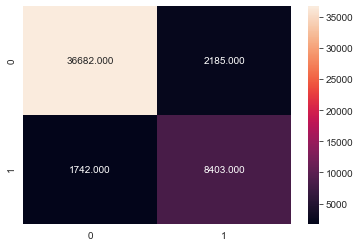

In [206]:
sns.heatmap(col,annot = True,fmt = '.3f')

#### Evaluate  ROC Curve

In [207]:
from sklearn.metrics import roc_curve, auc

In [208]:
# creating ROC curve of our test data
# To Do Replace 1,2,3,4
# 1 = Model name, 2 = train data, 3 = train label, 4 = test data
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

# fpr stands for false positive rate, and tpr stands for true positive rate.
#To do replace 5 with test label
fpr, tpr, thresholds = roc_curve(y_test, y_score)

#### Run Cell as is

AUC is 0.9516220263254362


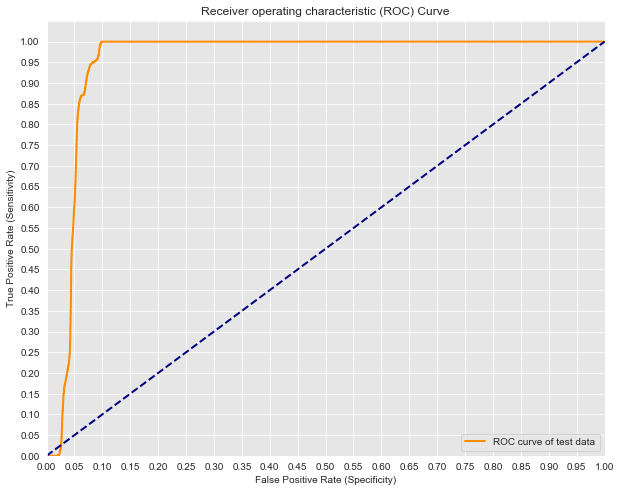

In [209]:
#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# printing AUC info
print('AUC is {}'.format(auc(fpr, tpr)))

# plotting the tpr and fpr
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve of test data')

# aesthetics
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Scale the data

In [210]:
from sklearn.preprocessing import MinMaxScaler

In [211]:
scaled = MinMaxScaler()
x_scaled = scaled.fit_transform(Data[['B','G','R']])

In [212]:
scale_train,scale_test,result_train,result_test = train_test_split(x_scaled,
                                                                  target,
                                                                  test_size = 0.2,
                                                                  random_state = 11)

#### Train Model

In [213]:
logreg1 = LogisticRegression()
logreg1.fit(scale_train,result_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predict 

In [214]:
y_pred1 = logreg1.predict(scale_test)

#### Check Accuracy

In [215]:
print('Accuracy is {:2.3f}'.format(accuracy_score(result_test,y_pred1)*100))

Accuracy is 92.098


# GREAT JOB!!!